<a href="https://colab.research.google.com/github/shreyashpu1/PW-Skills-Assignments/blob/main/06_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied Statistics and Inference

1. What are Type I and Type II errors in hypothesis testing, and how do they
impact decision-making?
- Type I Error (False Positive)
  - Occurs when we reject a true null hypothesis.
  - It means concluding that an effect or difference exists when it actually does not.
  - Eg: An innocent person is wrongly convicted.
  - Impact: Unfair outcome, Severe injustice, Loss of trust in the legal system.
- Type II Error (False Negative)
  - Occurs when we fail to reject a false null hypothesis.
  - It means missing a real effect or difference that actually exists.
  - Eg: The person is actually guilty, but the court acquits the person.
  - Impact: Missed detection, Criminal remains free, justice not served

2. What is the P-value in hypothesis testing, and how should it be interpreted
in the context of the null hypothesis?
- The p-value is the probability of observing the given result (or something more extreme) assuming the null hypothesis (H₀) is true.
- It helps us decide whether the observed data is strong enough to reject the null hypothesis.
- Interpretstion of P-value
  - Small p-value → The observed result is unlikely under the null hypothesis
  - Large p-value → The observed result is likely under the null hypothesis
- Decision Rule (Using Significance Level α)
  - If p-value ≤ α (e.g., 0.05) → Reject the null hypothesis
  - If p-value > α → Fail to reject the null hypothesis
- Interpretation in Context of the Null Hypothesis
  - A low p-value suggests that the data provides strong evidence against H₀.
  - A high p-value suggests there is not enough evidence to reject H₀.
  - The p-value does not prove H₀ true or false — it only measures evidence against it.

3. Explain the difference between a Z-test and a T-test, including when to use
each.
- Z-Test:
  - Used when the population standard deviation (σ) is known.
  - Suitable for large sample sizes (usually n ≥ 30).
  - Assumes the data follows a normal distribution.
  - Based on the standard normal distribution.
  - When to use: Large sample, Population variance is known.
- T-Test:
  - Used when the population standard deviation is unknown.
  - Suitable for small sample sizes (usually n < 30).
  - Assumes data is approximately normally distributed.
  - Based on the Student’s t-distribution.
  - When to use: Small sample, Population variance is unknown.

4. What is a confidence interval, and how does the margin of error influence
its width and interpretation?
- A confidence interval (CI) is a range of values that is likely to contain the true population parameter (such as mean or proportion).
- It provides an estimate along with a measure of uncertainty around that estimate.
- The Margin of Error (MOE) represents the maximum expected difference between the sample estimate and the true population value.
- A confidence interval is calculated as: Estimate ± Margin of Error
- A wider interval means the estimate is less precise.
- A narrower interval means the estimate is more precise.
- Increasing the confidence level increases the margin of error, making the interval wider.

5. Describe the purpose and assumptions of an ANOVA test. How does it
extend hypothesis testing to more than two groups?
- Purpose of ANOVA (Analysis of Variance)
  - ANOVA is used to compare the means of three or more groups.
  - It helps determine whether at least one group mean is significantly different from the others.
  - It avoids performing multiple t-tests, which would increase the chance of Type I error.
- Assumptions of ANOVA
  - Independence: Observations in each group are independent.
  - Normality: Data in each group is approximately normally distributed.
  - Homogeneity of variance: All groups have roughly equal variances.
  - Absence of outliers.
- How ANOVA Extends Hypothesis Testing to Multiple Groups
  - Instead of comparing groups pairwise, ANOVA compares variance between groups to variance within groups.
  - It uses the F-statistic, which is the ratio of:
    - Variability between group means
    - Variability within the groups
  - If the between-group variance is significantly larger, ANOVA rejects the null hypothesis.


In [ ]:
#  6. Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.
import numpy as np

population = np.random.randn(100)
population_mean = np.mean(population)
population_std = np.std(population)

print("Population Mean:", population_mean)

null_mean = 0.09 #hypothesis
#alternate >= 0.09

from statsmodels.stats.weightstats import ztest
zscore, pvalue = ztest(population, value = null_mean, alternative = 'larger')

print("Z-score:", zscore)
print("P-value:", pvalue)

if pvalue <= 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject null hypothesis")

Population Mean: 0.0576981986285415
Z-score: -0.32020777282636076
P-value: 0.625594584348495
fail to reject null hypothesis


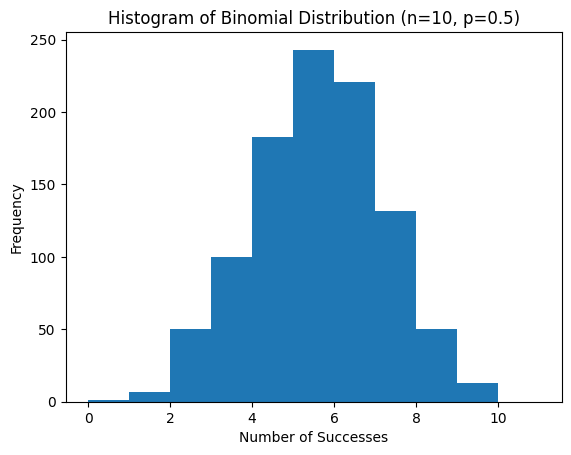

In [ ]:
# 7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10
p = 0.5
size = 1000

# Simulate binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=range(0, n + 2))
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Histogram of Binomial Distribution (n=10, p=0.5)")
plt.show()

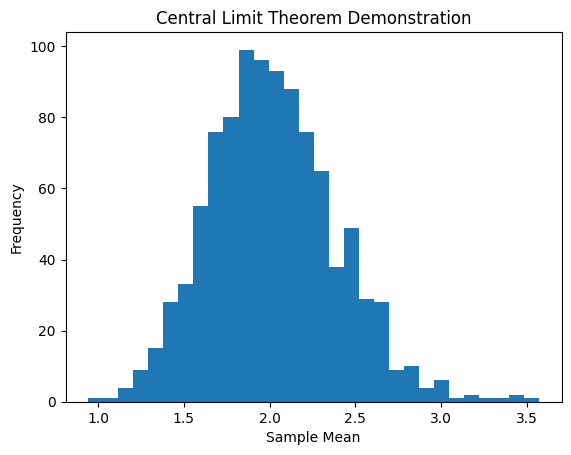

In [ ]:
#8. Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

import numpy as np
import matplotlib.pyplot as plt

# Generate data from a non-normal distribution (Exponential)
population = np.random.exponential(scale=2, size=100000)

# Parameters
sample_size = 30
num_samples = 1000

# Generate sample means
sample_means = [
    np.mean(np.random.choice(population, sample_size))
    for _ in range(num_samples)
]

# Plot histogram of sample means
plt.hist(sample_means, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem Demonstration")
plt.show()

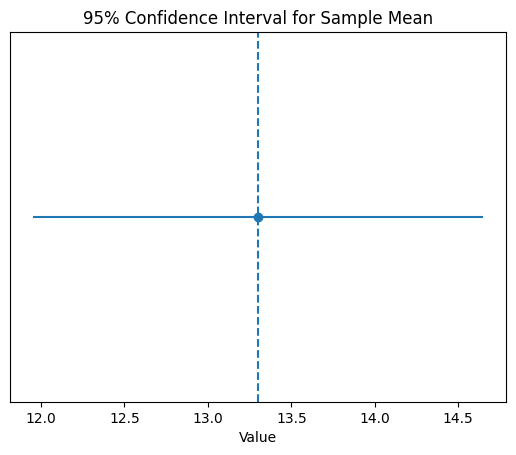


Sample Mean: 13.3
Confidence Interval: (np.float64(11.949004085681757), np.float64(14.650995914318244))


In [ ]:
#9. Write a Python function to calculate and visualize the confidence interval for a sample mean.
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_confidence_interval(sample, confidence):
    sample = np.array(sample)
    n = len(sample)
    mean = np.mean(sample)
    std_error = stats.sem(sample)

    # Calculate confidence interval using t-distribution
    ci_low, ci_high = stats.t.interval(confidence, df=n-1, loc=mean, scale=std_error)

    # Plot confidence interval
    plt.errorbar(mean, 0, xerr=[[mean - ci_low], [ci_high - mean]], fmt='o')
    plt.axvline(mean, linestyle='--')
    plt.title(f"{int(confidence*100)}% Confidence Interval for Sample Mean")
    plt.xlabel("Value")
    plt.yticks([])
    plt.show()

    return mean, ci_low, ci_high

data = [12, 15, 14, 10, 13, 16, 14, 15, 11, 13]
confidence=0.95
mean, lower, upper = plot_confidence_interval(data, confidence)

print("\nSample Mean:", mean)
print("Confidence Interval:", (lower, upper))



In [ ]:
#10. Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

from scipy.stats import chisquare

# Observed frequencies
observed = [18, 22, 20, 19, 21]

# Expected frequencies (uniform distribution)
expected = [20, 20, 20, 20, 20]

# Perform Chi-square goodness-of-fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Statistic:", chi_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Chi-square Statistic: 0.5
P-value: 0.9735009788392561
Fail to reject the null hypothesis


- Explanation of the Test
  - Null Hypothesis (H₀): The observed data follows the expected distribution.
  - Alternative Hypothesis (H₁): The observed data does not follow the expected distribution.
- Interpreting the Outcome
  - The Chi-square statistic measures how much the observed values differ from the expected values.
  - The p-value tells us whether this difference is statistically significant.
- The Chi-square goodness-of-fit test checks whether observed frequencies match an expected distribution, and the p-value helps determine if the difference is statistically significant.